In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Error as e:
    print(e)

In [17]:
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
# conn.tables

In [18]:
# tables.fetchall()

[(u'sqlite_sequence',),
 (u'Player_Attributes',),
 (u'Player',),
 (u'Match',),
 (u'League',),
 (u'Country',),
 (u'Team',),
 (u'Team_Attributes',)]

In [88]:
players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [80]:
num_matches = g.merge(league,left_on='league_id',right_on='id')
num_matches['no_of_matches'] = num_matches['count']
num_matches = num_matches[['name', 'no_of_matches']]

In [82]:
num_matches

,name,no_of_matches
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


In [99]:
barca = team_attr.iloc[123]
barca = barca.drop(['id','team_fifa_api_id','team_api_id','date'])
barca = pd.DataFrame(barca)

In [103]:
# barca.to_html()

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>FC Barcelona</th>    </tr>  </thead>  <tbody>    <tr>      <th>buildUpPlaySpeed</th>      <td>36</td>    </tr>    <tr>      <th>buildUpPlaySpeedClass</th>      <td>Balanced</td>    </tr>    <tr>      <th>buildUpPlayDribbling</th>      <td>35</td>    </tr>    <tr>      <th>buildUpPlayDribblingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>buildUpPlayPassing</th>      <td>51</td>    </tr>    <tr>      <th>buildUpPlayPassingClass</th>      <td>Mixed</td>    </tr>    <tr>      <th>buildUpPlayPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>chanceCreationPassing</th>      <td>36</td>    </tr>    <tr>      <th>chanceCreationPassingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationCrossing</th>      <td>49</td>    </tr>    <tr>      <th>chanceCreationCrossingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationShooting</th>      <td>56</td>    </tr>    <tr>      <th>chanceCreationShootingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>defencePressure</th>      <td>61</td>    </tr>    <tr>      <th>defencePressureClass</th>      <td>Medium</td>    </tr>    <tr>      <th>defenceAggression</th>      <td>65</td>    </tr>    <tr>      <th>defenceAggressionClass</th>      <td>Press</td>    </tr>    <tr>      <th>defenceTeamWidth</th>      <td>65</td>    </tr>    <tr>      <th>defenceTeamWidthClass</th>      <td>Normal</td>    </tr>    <tr>      <th>defenceDefenderLineClass</th>      <td>Cover</td>    </tr>  </tbody></table>

In [27]:
players[players['player_name'] == 'Lionel Messi']

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [34]:
# player_attr[player_attr['player_api_id'] == 30981]
messi = player_attr.iloc[102482].drop(['id','player_fifa_api_id','player_api_id','date','preferred_foot','attacking_work_rate',
                              'defensive_work_rate'])

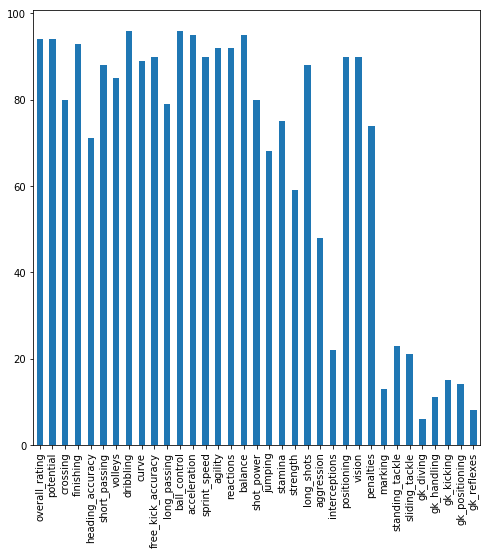

In [107]:
messi.plot(kind='bar',figsize=(8,8))
plt.savefig('messi.png',bbox_inches='tight')
plt.show()

In [75]:
match.shape

(25979, 115)

In [62]:
g = match.groupby('league_id').count()
g['count'] = g['id']
g = pd.DataFrame(g['count'])

In [87]:
# league

In [70]:
g['league_id'] = g.index

In [86]:
keys = match.keys()
for k in keys:
#     print k

IndentationError: expected an indented block (<ipython-input-86-69e6230dec3d>, line 3)

# Data Preprocessing

In [246]:
event_data = pd.read_csv("./data/event_data.csv")
line_up = pd.read_csv("./data/lineup.csv")
match_data = pd.read_csv("./data/match_data.csv")
match_data['match_id'] = match_data['temp_id']
match_data.drop('temp_id',axis=1,inplace=True)
event_data['match_id'] = event_data['join_id']
event_data.drop('join_id',axis=1,inplace=True)


In [247]:
event_data.head()

,id,minute,player_name,event_type,event_datacol,match_id
0,1477,85',G. Xhaka,Assist,H,1510524195220
1,1478,85',O. Giroud,Goal,H,1510524195220
2,1479,83',G. Xhaka,Assist,H,1510524195220
3,1480,83',A. Ramsey,Goal,H,1510524195220
4,1481,75',T. Walcott,D. Welbeck,H,1510524195220


In [248]:
# line_up.head()

In [249]:
match_data.head()

,id,week,home,away,date,winner,score,match_id
0,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220
1,108,1,Watford FC,Liverpool FC,8/12/17,0,3 - 3,1510524198580
2,109,1,Chelsea FC,Burnley FC,8/12/17,-1,2 - 3,1510524201480
3,110,1,Crystal Palace FC,Huddersfield Town FC,8/12/17,-1,0 - 3,1510524205545
4,111,1,Everton FC,Stoke City FC,8/12/17,1,1 - 0,1510524208824


In [250]:
# match_ids = list(set(minute_data.temp_id))
# matches = pd.DataFrame(data=match_ids,columns=['temp_id'])
minutes = pd.DataFrame(range(91),columns=['minute'])
match_data['dump'] = [1 for i in range(match_data.shape[0])]
minutes['dump'] = [1 for i in range(minutes.shape[0])]

match_data = pd.merge(match_data,minutes).drop('dump',axis=1)

In [251]:
event_data.dropna(inplace=True,axis=0, how= 'any')
event_data.minute = event_data.minute.astype("str")
for i,row in event_data.iterrows():
    if "+" in event_data.loc[i,('minute')]:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:2]
    else:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:-1]

event_data.minute = event_data.minute.astype("int")

In [252]:
# match_data['join_id'] = str(match_data['match_id'])+str(match_data['minute'])
# event_data['join_id'] = str(event_data['match_id'])+str(event_data['minute'])

In [254]:
# event_data.drop_duplicates(subset=["match_id", "minute"], keep='first', inplace=True)
event_data.sort_values(["match_id",'minute'],inplace=True)
event_data.head(10)

,id,minute,player_name,event_type,event_datacol,match_id
9,1486,2,Mohamed Elneny,Assist,H,1510524195220
10,1487,2,A. Lacazette,Goal,H,1510524195220
19,1496,5,S. Okazaki,Goal,A,1510524195220
20,1497,5,H. Maguire,Assist,A,1510524195220
17,1494,29,M. Albrighton,Assist,A,1510524195220
18,1495,29,J. Vardy,Goal,A,1510524195220
7,1484,45,S. Kolašinac,Assist,H,1510524195220
8,1485,45,D. Welbeck,Goal,H,1510524195220
15,1492,56,R. Mahrez,Assist,A,1510524195220
16,1493,56,J. Vardy,Goal,A,1510524195220


In [222]:
match_data.head(20)

,id,week,home,away,date,winner,score,match_id,minute
0,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,0
1,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1
2,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,2
3,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,3
4,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,4
5,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,5
6,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,6
7,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,7
8,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,8
9,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,9


In [223]:
minute_data = pd.merge(left=match_data,right=event_data,on=["match_id", "minute"],how='left')
minute_data.dropna(inplace=True,axis=0, how= 'any')

In [224]:
minute_data.sort_values(["match_id",'minute'],inplace=True)

In [225]:
minute_data.head(90)

,id_x,week,home,away,date,winner,score,match_id,minute,id_y,player_name,event_type,event_datacol
2,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,2,1486.0,Mohamed Elneny,Assist,H
5,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,5,1496.0,S. Okazaki,Goal,A
29,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,29,1494.0,M. Albrighton,Assist,A
45,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,45,1484.0,S. Kolašinac,Assist,H
56,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,56,1492.0,R. Mahrez,Assist,A
67,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,67,1482.0,O. Giroud,R. Holding,H
72,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,72,1491.0,D. Amartey,S. Okazaki,A
75,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,75,1481.0,T. Walcott,D. Welbeck,H
82,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,82,1490.0,K. Iheanacho,M. James,A
83,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,83,1479.0,G. Xhaka,Assist,H


In [110]:
minute_data.minute = minute_data.minute.astype("str")
for i,row in minute_data.iterrows():
    if "+" in minute_data.loc[i,('minute')]:
        minute_data.loc[i,('minute')] = minute_data.loc[i,('minute')][:2]
    else:
        minute_data.loc[i,('minute')] = minute_data.loc[i,('minute')][:-1]

minute_data.minute = minute_data.minute.astype("int")

In [ ]:
minute_data.sort_values(["temp_id",'minute'],inplace=True)

In [112]:
minute_data

,id_x,week,home,away,date,winner,score,temp_id,id_y,minute,player_name,event_type,event_datacol
9,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1486,2,Mohamed Elneny,Assist,H
10,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1487,2,A. Lacazette,Goal,H
19,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1496,5,S. Okazaki,Goal,A
20,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1497,5,H. Maguire,Assist,A
17,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1494,29,M. Albrighton,Assist,A
18,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1495,29,J. Vardy,Goal,A
7,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1484,45,S. Kolašinac,Assist,H
8,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1485,45,D. Welbeck,Goal,H
15,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1492,56,R. Mahrez,Assist,A
16,107,1,Arsenal FC,Leicester City FC,8/11/17,1,4 - 3,1510524195220,1493,56,J. Vardy,Goal,A


In [142]:
match_ids = list(set(minute_data.temp_id))
matches = pd.DataFrame(data=match_ids,columns=['temp_id'])
minutes = pd.DataFrame(range(90),columns=['minute'])
matches['dump'] = [1 for i in range(matches.shape[0])]
minutes['dump'] = [1 for i in range(minutes.shape[0])]

temp = pd.merge(matches,minutes).drop('dump',axis=1)

In [143]:
temp = pd.merge(temp,minute_data,how='left')

In [144]:
temp.sort_values(['temp_id',"minute"])

,temp_id,minute,id_x,week,home,away,date,winner,score,id_y,player_name,event_type,event_datacol
3796,1510524195220,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,1510524195220,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,1510524195220,2,107.0,1.0,Arsenal FC,Leicester City FC,8/11/17,1.0,4 - 3,1486.0,Mohamed Elneny,Assist,H
3799,1510524195220,2,107.0,1.0,Arsenal FC,Leicester City FC,8/11/17,1.0,4 - 3,1487.0,A. Lacazette,Goal,H
3800,1510524195220,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3801,1510524195220,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3802,1510524195220,5,107.0,1.0,Arsenal FC,Leicester City FC,8/11/17,1.0,4 - 3,1496.0,S. Okazaki,Goal,A
3803,1510524195220,5,107.0,1.0,Arsenal FC,Leicester City FC,8/11/17,1.0,4 - 3,1497.0,H. Maguire,Assist,A
3804,1510524195220,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3805,1510524195220,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:

for match in match_ids:
    temp = minute_data[minute_data['match_id'] == match]
    minute_data.append()
    for m in range(90):
        if len(minute_data[minute_data['temp_id'] == match & minute_data['minute'] == m]) == 0:
            minute_data.append()